In [1]:
import pandas as pd

tf = pd.read_csv(r'C:\Users\vidhi\Downloads\NYPD_Complaint_Data\NYPD_Complaint_Data_Historic.csv')

C:\Users\vidhi\AppData\Local\Temp\ipykernel_14536\15966944.py:3: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  tf = pd.read_csv(r'C:\Users\vidhi\Downloads\NYPD_Complaint_Data\NYPD_Complaint_Data_Historic.csv')


In [2]:
print(tf.shape)

(7825499, 35)


In [3]:
tf.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


In [4]:
#See the percentege of missing values in each variable
(tf.isna().sum()/tf.shape[0]*100).sort_values(ascending=False)

PARKS_NM             99.605712
STATION_NAME         97.795987
TRANSIT_DISTRICT     97.795987
HADEVELOPT           95.548028
HOUSING_PSA          92.341792
SUSP_AGE_GROUP       62.403292
SUSP_SEX             46.618650
SUSP_RACE            44.915065
CMPLNT_TO_DT         22.289876
CMPLNT_TO_TM         22.228346
VIC_AGE_GROUP        20.937259
LOC_OF_OCCUR_DESC    20.676803
PREM_TYP_DESC         0.536899
OFNS_DESC             0.240649
Y_COORD_CD            0.221571
X_COORD_CD            0.221571
Lat_Lon               0.221571
Latitude              0.221571
Longitude             0.221571
BORO_NM               0.159479
PATROL_BORO           0.092237
PD_DESC               0.086397
PD_CD                 0.086397
JURISDICTION_CODE     0.086397
ADDR_PCT_CD           0.027679
CMPLNT_FR_DT          0.008370
VIC_RACE              0.004984
VIC_SEX               0.003936
CRM_ATPT_CPTD_CD      0.002147
CMPLNT_FR_TM          0.000613
JURIS_DESC            0.000000
LAW_CAT_CD            0.000000
KY_CD   

In [5]:
tf["SUSP_RACE"] = tf["SUSP_RACE"].astype("category")
tf["SUSP_RACE"] = tf["SUSP_RACE"].cat.remove_categories("UNKNOWN")

In [6]:
#dropping rows with NaN values
tf.dropna(subset=['Y_COORD_CD','X_COORD_CD','Latitude','Longitude','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','Lat_Lon','CMPLNT_FR_DT','BORO_NM','OFNS_DESC','SUSP_SEX','SUSP_RACE'], inplace=True)

#dropping columns that are not significant for future data exploration
tf.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)

tf.drop(['PREM_TYP_DESC','SUSP_AGE_GROUP','JURISDICTION_CODE'], axis='columns', inplace=True)

tf.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','PATROL_BORO','CMPLNT_TO_DT','CMPLNT_TO_TM'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
tf.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
tf.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_AGE_GROUP' with UNKNOWN
tf.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
tf.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)

print('Clean dataset: ')
print("Observations: ", tf.shape[0])
print("Variables: ", tf.shape[1])

#examing the changes
tf.head(5)

Clean dataset: 
Observations:  3133587
Variables:  21


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,...,X_COORD_CD,Y_COORD_CD,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
3,352454313,12/28/2019,01:00:00,12/28/2019,126,MISCELLANEOUS PENAL LAW,COMPLETED,FELONY,BRONX,REAR OF,...,1026412.0,258211.0,BLACK,M,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",UNKNOWN,UNKNOWN,E
8,855385879,12/26/2019,19:57:00,12/26/2019,361,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BRONX,UNKNOWN,...,1007027.0,245405.0,BLACK,F,40.840234,-73.917684,"(40.84023413800003, -73.91768411399994)",18-24,BLACK,F
15,636997863,12/20/2019,22:18:00,12/20/2019,344,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,BRONX,INSIDE,...,1014563.0,253789.0,BLACK,M,40.863223,-73.890411,"(40.86322306500005, -73.89041071099996)",18-24,BLACK,F
19,800366831,12/19/2019,17:50:00,12/19/2019,341,PETIT LARCENY,COMPLETED,MISDEMEANOR,BRONX,INSIDE,...,1023380.0,239329.0,WHITE HISPANIC,M,40.823500,-73.858619,"(40.823499964000064, -73.85861898699994)",UNKNOWN,UNKNOWN,D
20,354566222,12/19/2019,02:50:00,12/19/2019,104,RAPE,COMPLETED,FELONY,BRONX,INSIDE,...,1008798.0,238971.0,BLACK HISPANIC,M,40.822570,-73.911307,"(40.82256991600008, -73.91130716899994)",<18,BLACK HISPANIC,F


In [7]:
tf.OFNS_DESC.unique()

array(['MISCELLANEOUS PENAL LAW', 'OFF. AGNST PUB ORD SENSBLTY &',
       'ASSAULT 3 & RELATED OFFENSES', 'PETIT LARCENY', 'RAPE',
       'SEX CRIMES', 'HARRASSMENT 2', 'FELONY ASSAULT', 'ROBBERY',
       'FORGERY', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS',
       'CRIMINAL TRESPASS', 'OFFENSES INVOLVING FRAUD',
       'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON',
       'FRAUDS', 'ADMINISTRATIVE CODE', 'VEHICLE AND TRAFFIC LAWS',
       'BURGLARY', 'GRAND LARCENY OF MOTOR VEHICLE', 'ESCAPE 3',
       'CRIMINAL MISCHIEF & RELATED OF', 'INTOXICATED & IMPAIRED DRIVING',
       'NYS LAWS-UNCLASSIFIED FELONY', 'GRAND LARCENY',
       'POSSESSION OF STOLEN PROPERTY', 'OTHER OFFENSES RELATED TO THEF',
       'UNAUTHORIZED USE OF A VEHICLE', 'ARSON', "BURGLAR'S TOOLS",
       'THEFT-FRAUD', 'THEFT OF SERVICES', 'ENDAN WELFARE INCOMP',
       'OTHER STATE LAWS (NON PENAL LA', 'OFFENSES AGAINST PUBLIC SAFETY',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'GAMBLING',
       'F

In [8]:
tf_clean = tf.replace({'HARRASSMENT 2': 'HARASSMENT', 
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE'}).copy()

In [9]:
#types of crimes (top 10)
tf_clean.OFNS_DESC.value_counts().iloc[:10]

HARASSMENT                                      793333
ASSAULT & RELATED OFFENSES                      499823
PETIT LARCENY                                   307018
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION    271942
ROBBERY                                         193370
FELONY ASSAULT                                  170257
CRIMINAL MISCHIEF                               155548
GRAND LARCENY                                   130897
MISCELLANEOUS PENAL LAW                         110895
DANGEROUS DRUGS                                  94309
Name: OFNS_DESC, dtype: int64

In [10]:
tf.to_csv(r"C:\Users\vidhi\Downloads\NYPD_Complaint_Data\NYPD_new.csv")

Distribution of Crime in Each Borough:
BROOKLYN         945505
MANHATTAN        710577
BRONX            704629
QUEENS           624833
STATEN ISLAND    148043
Name: BORO_NM, dtype: int64


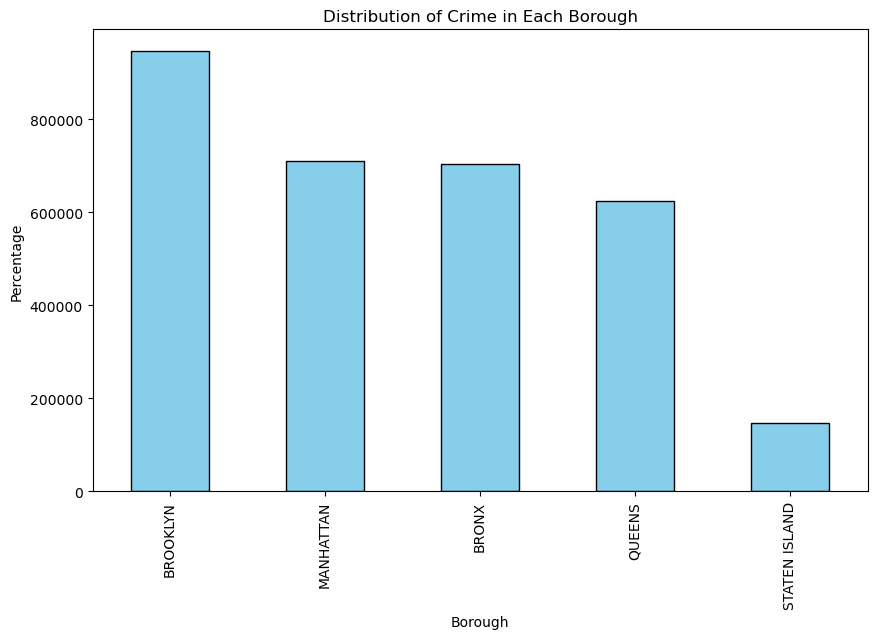

In [11]:
# Check for missing values in the 'BORO_NM' column
if tf['BORO_NM'].isnull().any():
    print("Warning: Missing values in the 'BORO_NM' column. Handle or remove them before proceeding.")

# Calculate the distribution of crime in each borough
borough_distribution = tf['BORO_NM'].value_counts()

# Display the distribution
print("Distribution of Crime in Each Borough:")
print(borough_distribution)

# Plot the distribution if you have matplotlib installed
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
borough_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Crime in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Percentage')
plt.show()

### Distribution crimes over the years, months and days 

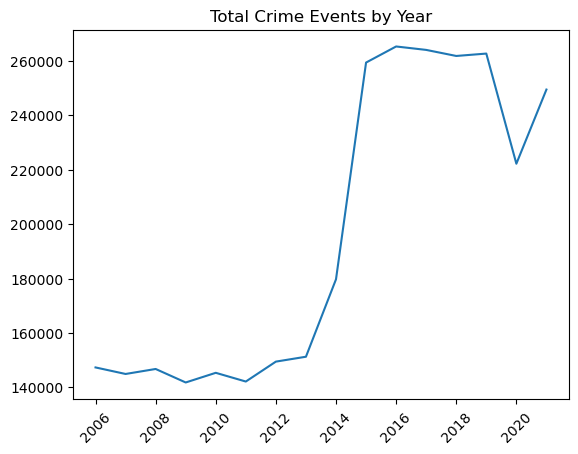

In [12]:
import matplotlib.pyplot as plt

# Assuming tf_clean is your DataFrame

# Extract the year and convert it to a numeric type for proper sorting
tf_clean['year'] = tf_clean['RPT_DT'].str.extract(r'(\d{4})').astype(float)

# Plot the line chart with years arranged in ascending order
tf_clean['year'].value_counts().sort_index().plot(kind="line", title="Total Crime Events by Year")

# Customize the x-axis labels if needed
plt.xticks(rotation=45)  # Adjust rotation for better visibility, if necessary

# Display the plot
plt.show()

<AxesSubplot:title={'center':'Total Crime Events by Month'}, xlabel='month'>

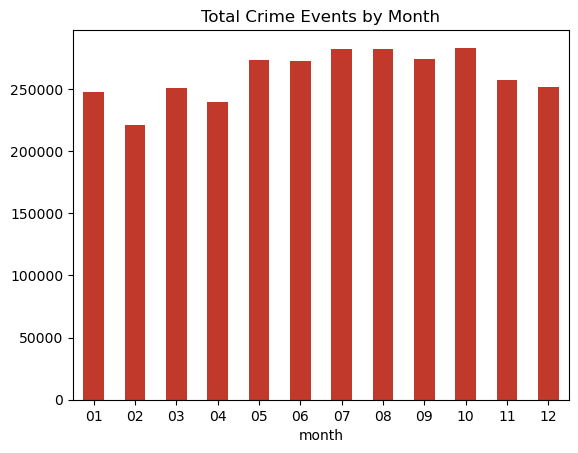

In [13]:
#reports by month
tf_clean['month'] = tf_clean['RPT_DT'].str.findall('(\d{2})').apply(lambda x: x[0])
tf_clean.groupby('month').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

#descending order
#tf['month'].value_counts().plot(kind="bar", xlabel = "months", ylabel = "reports", rot=0)

<AxesSubplot:title={'center':'Total Crime Events by Day'}, xlabel='hours'>

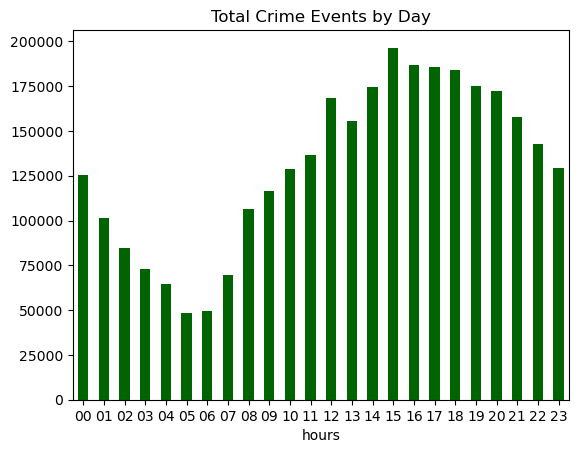

In [14]:
#reports by hour
tf_clean['time'] = tf_clean['CMPLNT_FR_TM'].str.findall('(\d{2})').apply(lambda x: x[0])
tf_clean.groupby('time').size().plot(kind = 'bar', title ='Crime Events by Day', color = '#006400', xlabel = 'hours',rot=0)

#descending order
#tf['time'].value_counts().plot(kind="bar", xlabel = "hours", ylabel = "reports", rot=0)

### Analyzing a Specific Crime

In [15]:
crimes_assault = tf_clean[tf.OFNS_DESC.str.contains('FELONY|ASSAULT')]
crimes_assault.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,RPT_DT,KY_CD,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,...,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,year,month,time
15,636997863,12/20/2019,22:18:00,12/20/2019,344,ASSAULT & RELATED OFFENSES,COMPLETED,MISDEMEANOR,BRONX,INSIDE,...,MALE,40.863223,-73.890411,"(40.86322306500005, -73.89041071099996)",18-24,BLACK,FEMALE,2019.0,12,22
41,815399488,12/12/2019,11:20:00,12/12/2019,106,FELONY ASSAULT,COMPLETED,FELONY,BRONX,UNKNOWN,...,FEMALE,40.830923,-73.920464,"(40.83092327800006, -73.92046361299998)",18-24,BLACK,MALE,2019.0,12,11
42,954363685,12/12/2019,01:00:00,12/12/2019,106,FELONY ASSAULT,COMPLETED,FELONY,QUEENS,INSIDE,...,MALE,40.715719,-73.736639,"(40.71571904900002, -73.73663905399997)",25-44,BLACK,MALE,2019.0,12,01
47,463377981,12/10/2019,15:30:00,12/10/2019,344,ASSAULT & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,UNKNOWN,...,FEMALE,40.816509,-73.946547,"(40.81650933700007, -73.94654695699995)",<18,BLACK,FEMALE,2019.0,12,15
61,807456815,12/06/2019,13:30:00,12/06/2019,344,ASSAULT & RELATED OFFENSES,COMPLETED,MISDEMEANOR,QUEENS,UNKNOWN,...,MALE,40.708735,-73.790655,"(40.70873471300007, -73.79065530299994)",45-64,BLACK,FEMALE,2019.0,12,13


In [16]:
crimes_assault.shape

(673175, 24)

42073.44


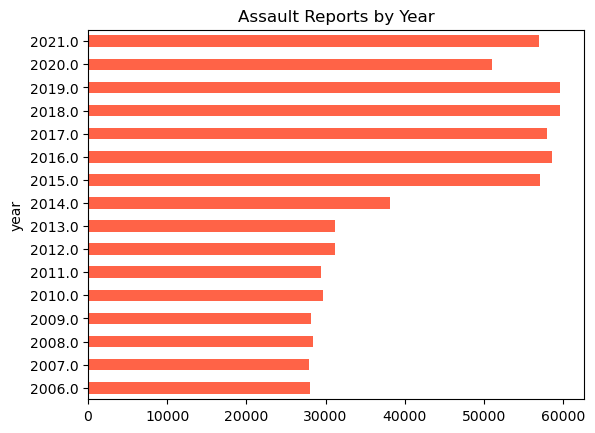

In [21]:
#plot graph
crimes_assault.groupby('year').size().plot(kind = 'barh', color = '#FF6347', title = 'Assault Reports by Year')

#average sex crimes per year
mean = crimes_assault['year'].value_counts().mean()
print(round(mean,2))

<AxesSubplot:title={'center':'Assault Reports by Hour'}, xlabel='time'>

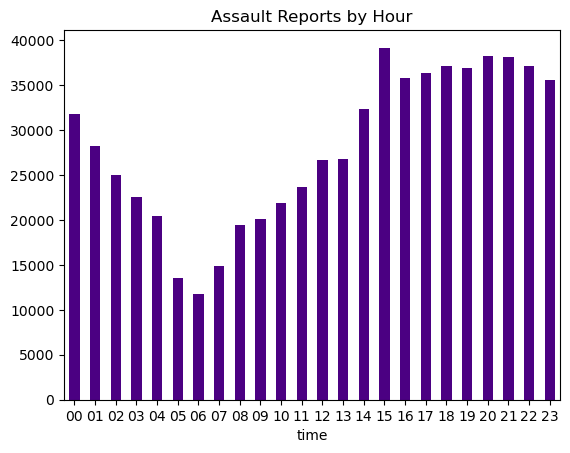

In [22]:
#plot graph
crimes_assault.groupby('time').size().plot(kind = 'bar', color = '#4B0082', rot=0, title = 'Assault Reports by Hour')

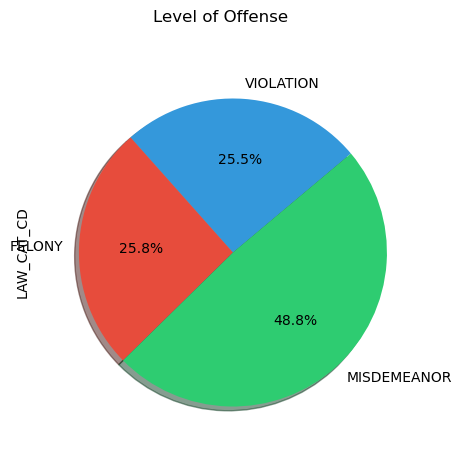

In [19]:
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']  # Add more colors as needed

tf_clean['LAW_CAT_CD'].value_counts().sort_values().plot(
    kind='pie',
    subplots=True,
    shadow=True,
    startangle=40,
    figsize=(10, 5),
    autopct='%1.1f%%',
    title='Level of Offense',
    colors=colors
)

plt.show()

LAW_CAT_CD     FELONY  MISDEMEANOR  VIOLATION      All
BORO_NM                                               
BRONX          168408       359874     176347   704629
BROOKLYN       264601       435804     245100   945505
MANHATTAN      184372       367512     158693   710577
QUEENS         165395       291775     167663   624833
STATEN ISLAND   25215        72737      50091   148043
All            807991      1527702     797894  3133587


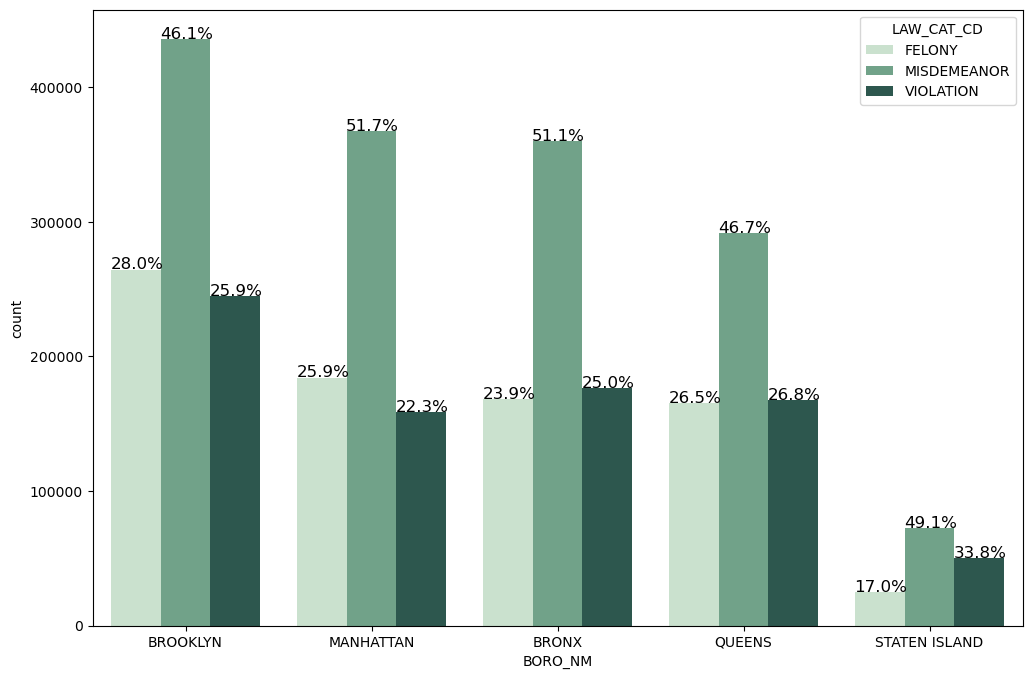

In [25]:
import seaborn as sns
# tabulate a two way table with variables as boroughs and level of crime
two_way_table = pd.crosstab(index=tf["BORO_NM"], columns=tf["LAW_CAT_CD"], margins=True)
print(two_way_table)

boro_name = ['MANHATTAN', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']
crime_level = ['VIOLATION', 'MISDEMEANOR', 'FELONY']
subtotal_boro = tf.groupby('BORO_NM')['LAW_CAT_CD'].agg('count').sort_values(ascending=False) #total of each boro count
fig = plt.figure(figsize=[12,8])
ax = sns.countplot(x="BORO_NM", hue="LAW_CAT_CD", 
                   data=tf[['BORO_NM', 'LAW_CAT_CD']], 
                   order = subtotal_boro.index,
                  palette = "ch:2.5,-.2,dark=.3")

# boro_num = [val for val in range(0, 5) for _ in (0, 1, 2)] #[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4] not work!
boro_num2 = [val for val in range(0, 5)]*3 #[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,] work for the order
for p, i in zip(ax.patches, boro_num2):
    percent = p.get_height()/subtotal_boro[i]
    ax.annotate('{:.1f}%'. format(percent*100), (p.get_x()+0.138, p.get_height()+300), ha='center', size=12)

plt.savefig('level of crime at each borough.PNG')
